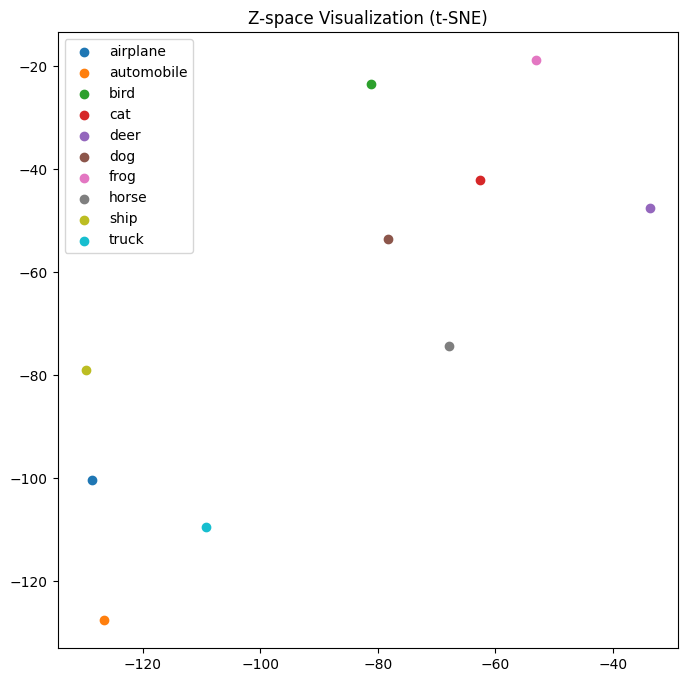

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# CIFAR-10 类别名称
CIFAR10_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 读取 GloVe 文件
def load_glove_embeddings(glove_path, classes):
    embeddings = {}
    with open(glove_path, 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector

    # 提取 CIFAR-10 类别的词向量
    z_space = np.array([embeddings[c] for c in classes if c in embeddings])
    return z_space

# 可视化 Z-space
def visualize_z_space(z_space, classes):
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # 将 perplexity 设置为小于样本数
    z_tsne = tsne.fit_transform(z_space)

    plt.figure(figsize=(8, 8))
    for i, label in enumerate(classes):
        plt.scatter(z_tsne[i, 0], z_tsne[i, 1], label=label)
    plt.legend()
    plt.title("Z-space Visualization (t-SNE)")
    plt.show()

if __name__ == "__main__":
    glove_path = '../root/data/glove.6B.50d.txt'
    z_space = load_glove_embeddings(glove_path, CIFAR10_CLASSES)
    visualize_z_space(z_space, CIFAR10_CLASSES)